## Data Preparation: EDF data file processing

This notebook guides you through:

1. **Loading EDF files**
2. **Inspecting & analyzing raw data with MNE**
3. **Basic Mne functionalities for preprocessing**
4. **Why conversion is needed**
5. **Converting to HDF5**
6. **Converting to NumPy arrays**
7. **Reusable functions for pipeline**
8. **Example usage and tips**

### The EDF File Format

The European Data Format (EDF) is a standard for storing physiological signals such as EEG and ECG. Key characteristics:

* **Header block**: Contains metadata (patient ID, recording start time, channel labels, sampling rates).
* **Data records**: Continuous samples for each channel, stored in contiguous blocks.
* **Extensibility**: Supports annotations and variable sample rates per channel.

*Advantages*: 
* Widely supported in research; 
* preserves metadata.

*Limitations*: 
* Not optimized for random access or large-scale analytics without conversion.

### Siena Scalp EEG Database

The **Siena Scalp EEG Database** is a publicly available dataset designed to support research on epileptic seizure prediction and detection. It contains long-term scalp EEG recordings from patients with epilepsy, collected under clinical conditions. The dataset is valuable for studying seizure onset patterns, interictal activity, and for training machine learning models aimed at seizure forecasting.

🔗 **Access the dataset**:
<br/>
[Siena Scalp EEG Database on PhysioNet](https://physionet.org/content/siena-scalp-eeg/1.0.0/)

📄 **Reference**:
<br/>
Detti, P., 2020. Siena scalp EEG database. PhysioNet. doi, 10, p.493. DOI: [10.13026/s309-a395](https://doi.org/10.13026/s309-a395)


### Loading EDF Files

Import the required libraries for file discovery and EDF reading:

In [1]:
import glob                     # to find .edf files
import mne                      # core package for electrophysiology data

In [2]:
# Get a list of file paths matching the pattern.
edf_paths = glob.glob(pathname="./edf_data/*.edf")

# loads the EDF into memory as a `Raw` object.
raw = mne.io.read_raw_edf(input_fname=edf_paths[0], preload=True)

Extracting EDF parameters from f:\Applications & Intels\University\Library\Practical Projects\Data Preparation (EDF)\edf_data\PN05-2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4733439  =      0.000 ...  9244.998 secs...


C:\Users\Phoenix_GLR\AppData\Local\Temp\ipykernel_1408\2957224367.py:5: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(input_fname=edf_paths[0], preload=True)
C:\Users\Phoenix_GLR\AppData\Local\Temp\ipykernel_1408\2957224367.py:5: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(input_fname=edf_paths[0], preload=True)
C:\Users\Phoenix_GLR\AppData\Local\Temp\ipykernel_1408\2957224367.py:5: RuntimeWarning: Highpass cutoff frequency 15.91549 is greater than lowpass cutoff frequency 15.0, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(input_fname=edf_paths[0], preload=True)


In [3]:
# View the summary number of channels, sampling rate, and data duration.
print(raw)

<RawEDF | PN05-2.edf, 37 x 4733440 (9245.0 s), ~1.30 GB, data loaded>


Using matplotlib as 2D backend.


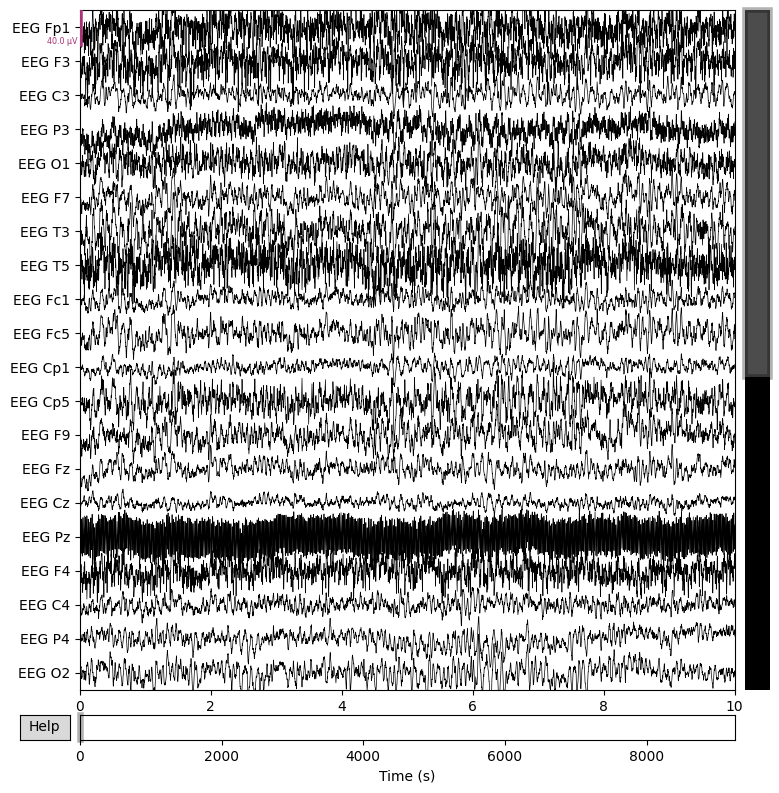

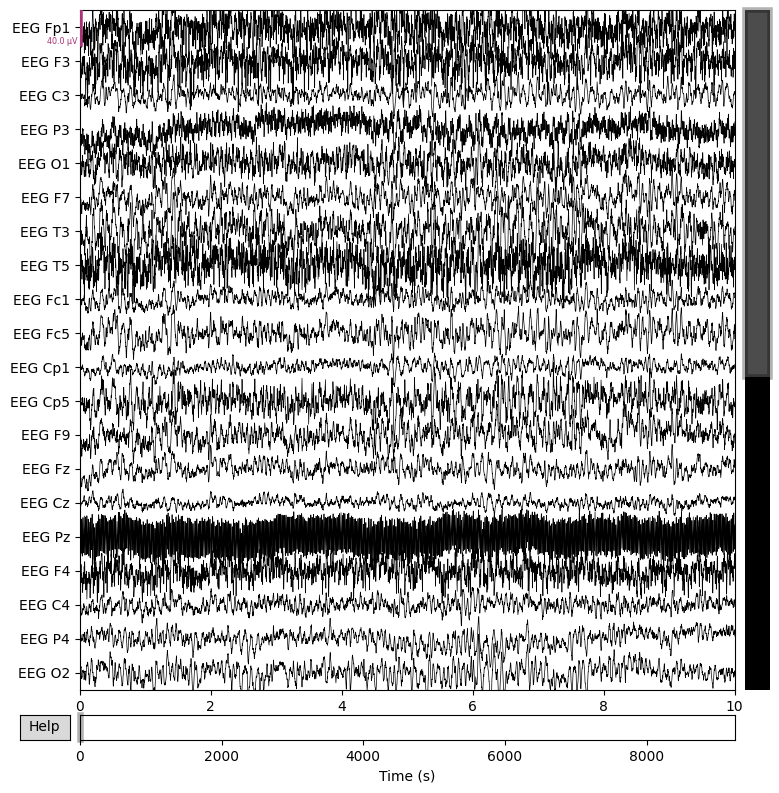

In [4]:
# Plot the signal over time.
raw.plot()

### Inspecting & Analyzing Raw Data with MNE

In [5]:
import numpy as np              # numerical arrays
import matplotlib.pyplot as plt # plotting

#### Metadata Inspection

In [6]:
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 37 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: 2016-01-01 06:46:02 UTC
 nchan: 37
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [7]:
# View start recording time, duration, and sampling frequency 

recording_start = raw.info['meas_date']
sampling_frequency = raw.info['sfreq']
recording_duration = raw.n_times / sampling_frequency  # Length in seconds

print("Recording started at:", recording_start)
print("Recording duration (seconds):", recording_duration)
print("Sampling frequency (Hz):", sampling_frequency)

Recording started at: 2016-01-01 06:46:02+00:00
Recording duration (seconds): 9245.0
Sampling frequency (Hz): 512.0


#### Viewing Channels & Selecting

In [8]:
# View list of channels
ch_names = raw.ch_names
print("Available channels:", ch_names)

Available channels: ['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 'EEG F9', 'EEG Fz', 'EEG Cz', 'EEG Pz', 'EEG F4', 'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10', 'EKG EKG', 'SPO2', 'HR', '1', '2', 'EEG FP2', 'EEG P9', 'EEG P10', 'MK']


In [9]:
# Pick EEG, ECG, or other biosignals, pick ECG channels ("1", "2", "EKG EKG")
# Channels 1, 2 are ECG leads
# Channel EKG EKG, is the reference lead included in EEG for ECG capturing
picks = mne.pick_channels(ch_names, include=["EKG EKG", "1", "2"])
raw.pick(picks)

<RawEDF | PN05-2.edf, 3 x 4733440 (9245.0 s), ~108.3 MB, data loaded>

#### Time-series Plot

In [10]:
raw = mne.io.read_raw_edf(input_fname=edf_paths[0], preload=True)

Extracting EDF parameters from f:\Applications & Intels\University\Library\Practical Projects\Data Preparation (EDF)\edf_data\PN05-2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4733439  =      0.000 ...  9244.998 secs...


C:\Users\Phoenix_GLR\AppData\Local\Temp\ipykernel_1408\2053261520.py:1: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(input_fname=edf_paths[0], preload=True)
C:\Users\Phoenix_GLR\AppData\Local\Temp\ipykernel_1408\2053261520.py:1: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(input_fname=edf_paths[0], preload=True)
C:\Users\Phoenix_GLR\AppData\Local\Temp\ipykernel_1408\2053261520.py:1: RuntimeWarning: Highpass cutoff frequency 15.91549 is greater than lowpass cutoff frequency 15.0, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(input_fname=edf_paths[0], preload=True)


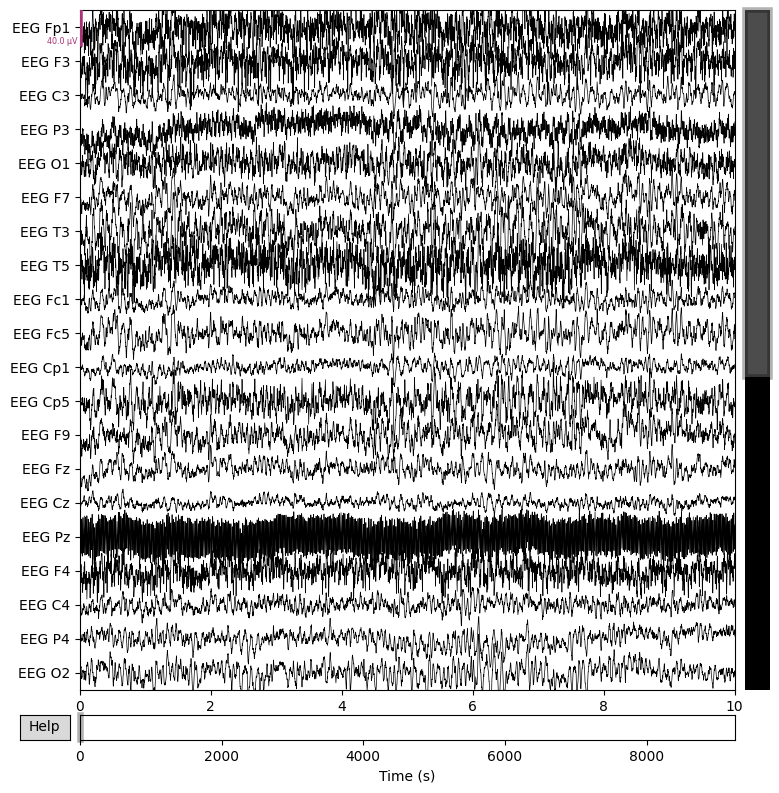

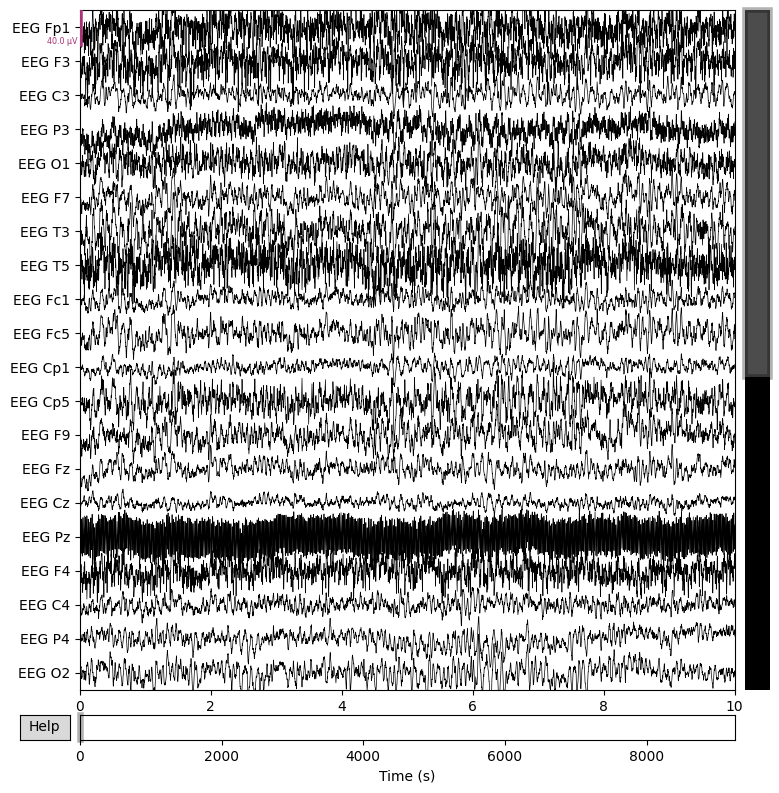

In [11]:
raw.plot(start=0, duration=10)  # 10-second window

> Interactive plot helps spot artifacts or flat channels. Clickable legends and zoom available.

#### Power Spectral Density (PSD)
Power Spectral Density analysis reveals how signal power is distributed across different frequency components. In MNE, `raw.plot_psd()` or `mne.time_frequency.psd_welch()` can be used to estimate PSD, helping identify oscillatory patterns (e.g., alpha, beta bands) or noise (e.g., line noise at 50/60 Hz).

Effective window size : 4.000 (s)


C:\Users\Phoenix_GLR\AppData\Local\Temp\ipykernel_1408\4068735398.py:1: UserWarning: Zero value in spectrum for channels SPO2, HR, MK
  psds, freqs = raw.compute_psd(fmin=0.5, fmax=50).get_data(return_freqs=True)


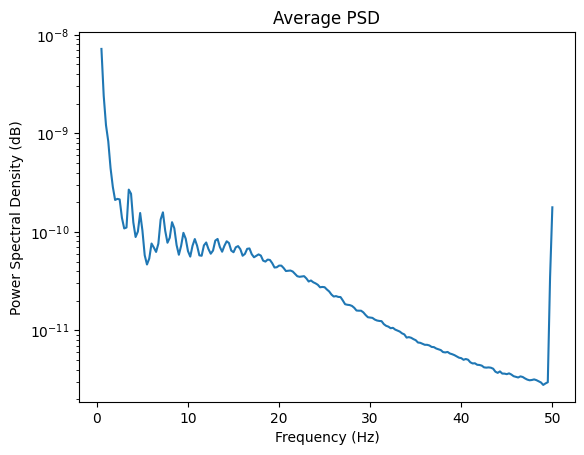

In [12]:
psds, freqs = raw.compute_psd(fmin=0.5, fmax=50).get_data(return_freqs=True)

plt.figure()
plt.semilogy(freqs, psds.mean(axis=0))
plt.title('Average PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB)')
plt.show()


> Analyzing PSD helps spot dominant rhythms (e.g., alpha, beta).

#### Filtering
Filtering is used to isolate relevant frequency components and remove noise. MNE supports:

* **High-pass filters** (e.g., removing slow drifts),
* **Low-pass filters** (e.g., removing high-frequency noise),
* **Band-pass filters** (e.g., isolating alpha or beta bands).
  Apply filters using `raw.filter(l_freq, h_freq)`.

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 3381 samples (6.604 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.2s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.2s


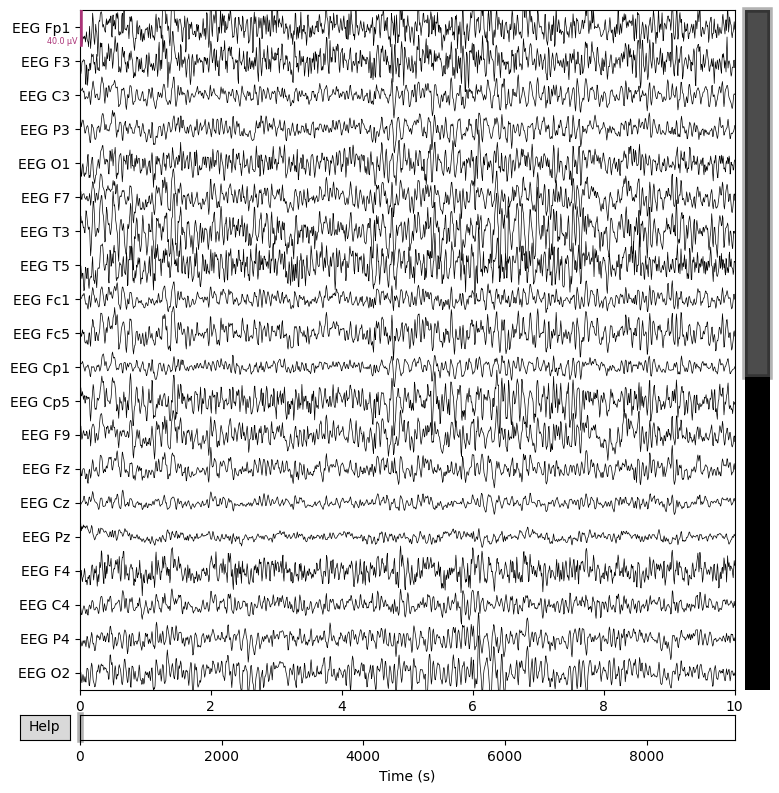

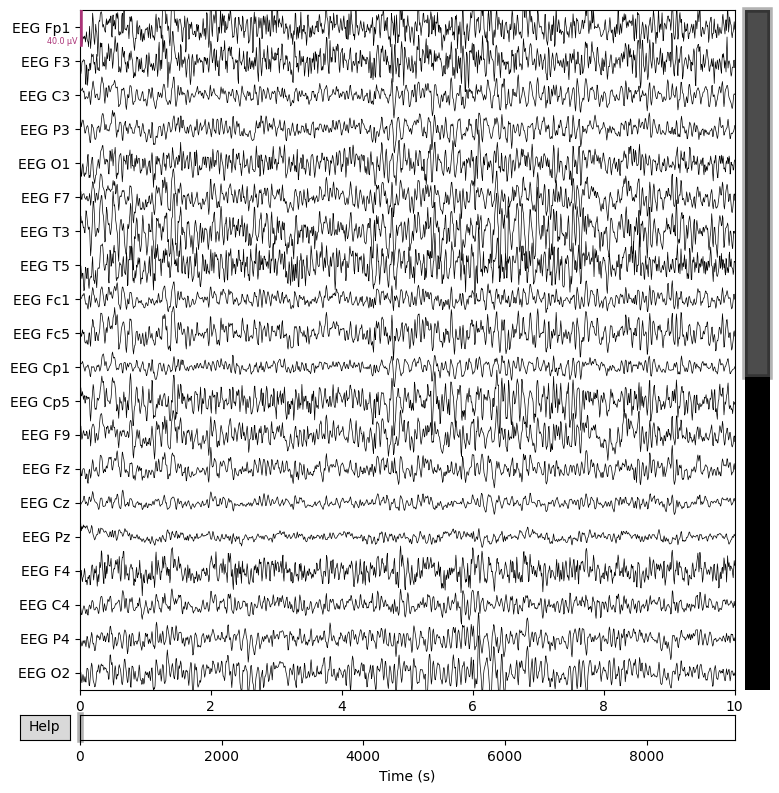

In [13]:
raw_notched = raw.copy().notch_filter(freqs=[50])  # remove powerline noise
raw_filtered = raw_notched.filter(1., 40.)         # bandpass for EEG
raw_filtered.plot()

> Filter steps are critical for removing noise and drift.

#### Resampling
Resampling adjusts the sampling frequency to reduce data size or match requirements for specific analyses. This is especially useful for speeding up computations. MNE provides `raw.resample(new_sfreq)` to downsample data while applying anti-aliasing filtering.

In [14]:
raw_resampled = raw.copy().resample(128)
print("New sampling rate:", raw_resampled.info['sfreq'])

New sampling rate: 128.0


> Downsampling reduces storage and speeds up training.

### Basic MNE Functionalities for Preprocessing

#### Events and Epoching
Events are time-locked markers (e.g., stimulus onsets) used to segment continuous data. Epoching slices the raw signal into short time windows around these events for trial-based analysis. Use `mne.find_events()` to detect events and `mne.Epochs()` to extract epochs from raw data.

In [15]:
# Example of generating dummy events (for testing)
events = mne.make_fixed_length_events(raw, id=1, duration=2.0)
epochs = mne.Epochs(raw, events, tmin=0, tmax=2, baseline=(0, 0.2), preload=True)
print(epochs)

Not setting metadata
4622 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 4622 events and 1025 original time points ...
0 bad epochs dropped
<Epochs | 4622 events (all good), 0 – 2 s (baseline 0 – 0.2 s), ~1.31 GB, data loaded,
 '1': 4622>


#### Averaging and Evoked Responses
Averaging across epochs produces an **Evoked response**, representing the brain’s average reaction to a specific stimulus. This is useful for studying event-related potentials (ERPs). Use `epochs.average()` to compute the evoked response and `evoked.plot()` to visualize it.

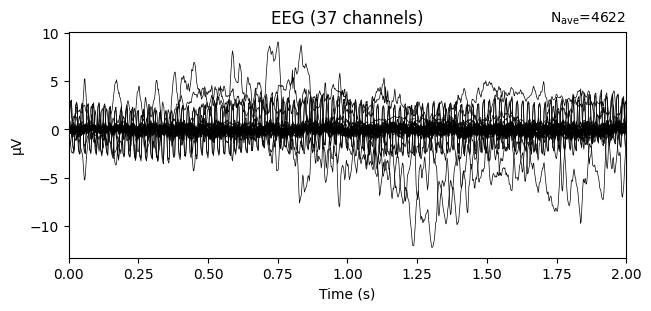

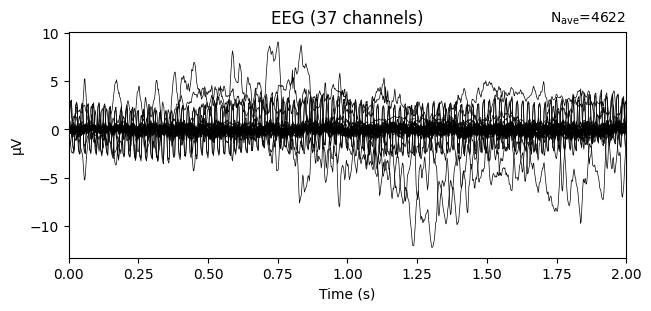

In [16]:
evoked = epochs.average()
evoked.plot()

### Why Not Work Directly in MNE?

* **Memory Efficiency**: MNE’s in-memory `Raw` object can be large.
* **Interoperability**: Machine learning pipelines use `NumPy`/`PyTorch`/`TensorFlow` formats.
* **Flexibility**: Storing as HDF5 or `.npy` enables selective loading and platform-agnostic usage.

**Conversion Options**

1. **HDF5** (`.hdf5`)

   * Pros: Hierarchical storage, metadata attributes, chunking and compression, scalable for large datasets.
   * Cons: Requires `h5py` or similar libraries.

2. **NumPy** (`.npy`)

   * Pros: Simple binary format, fast loading with `np.load`, ideal for array-only data.
   * Cons: No metadata beyond array shape and dtype.

3. **Parquet** (`.parquet`)

   * Pros: Columnar, compressed, integrates with `pandas` and big-data tools.
   * Cons: Overhead for purely numerical arrays; requires additional dependencies.

4. **MATLAB** (`.mat`)

   * Pros: Compatible with MATLAB workflows.
   * Cons: Proprietary, larger file sizes.

5. **CSV/TSV**

   * Pros: Human-readable, widely supported.
   * Cons: Inefficient for large arrays; loses numeric precision and metadata.


### HDF5 and h5py for Signal Analysis

**HDF5 (Hierarchical Data Format version 5)** is a versatile, open-source file format designed to store and organize large and complex datasets efficiently. It supports hierarchical organization of data (similar to folders and files), enabling users to store multiple datasets and metadata within a single file. This structure is particularly useful for managing high-dimensional data common in signal analysis, such as multichannel EEG or MEG recordings.

**h5py** is a popular Python library that provides a user-friendly interface to read, write, and manipulate HDF5 files. It allows seamless integration of HDF5’s powerful features within Python workflows.

**Why HDF5 files are suitable for signal analysis:**

* **Efficient Storage:** HDF5 supports compression and chunking, making it possible to store large continuous signals without excessive disk space usage.
* **Fast Access:** Partial data loading (reading only subsets) accelerates processing of large datasets without loading everything into memory.
* **Hierarchical Organization:** Complex experiments with multiple conditions, channels, and metadata can be cleanly organized and easily navigated.
* **Interoperability:** HDF5 files can be accessed from many programming languages and tools, facilitating collaboration.
* **Metadata Support:** Important information like sampling rates, channel labels, and event markers can be stored alongside raw signals.

Together, HDF5 and h5py provide a robust framework for managing, analyzing, and sharing complex signal datasets efficiently and reproducibly.

#### Converting EDF files to HDF5 (Read/Write)

In [17]:
import h5py

**Write `.hdf5` files**

In [18]:
# Set the channels name and their aliases:
selected_channels = ['1', '2']  # channels to keep from raw
new_channel_names = ['lead_i', 'lead_i']              # new names corresponding to selected channels

# Pick the channel indices corresponding to selected_channels
picks = [raw.ch_names.index(ch) for ch in selected_channels]

# Extract the data of selected channels
data_selected = raw.get_data(picks=picks)

# Times remain the same
times = raw.times

with h5py.File('subject_5_channels.h5', 'w') as h5f:
    h5f.create_dataset('times', data=times)
    dset = h5f.create_dataset('signals', data=data_selected)
    
    # Store new channel names as an attribute or dataset
    # Here as a dataset of variable-length UTF-8 strings
    dt = h5py.string_dtype(encoding='utf-8')
    h5f.create_dataset('channel_names', data=new_channel_names, dtype=dt)
    
    # Save some metadata attributes (only simple types)
    meta = h5f.create_group('metadata')
    for key, val in raw.info.items():
        if isinstance(val, (str, float, int, bytes)):
            meta.attrs[key] = val


**Read `.hdf5` files**

In [19]:
with h5py.File('subject_5_selected.h5', 'r') as hdf:
    # List all groups/datasets in the file
    print("Keys in the file:", list(hdf.keys()))
    
    # Read signals dataset
    signals = hdf['signals'][:]
    print("Signals shape:", signals.shape)
    print("Signals dtype:", signals.dtype)
    
    # Read times dataset
    times = hdf['times'][:]
    print("Times shape:", times.shape)
    
    # Read renamed channel names
    channel_names = hdf['channel_names'][:]
    # Convert bytes to strings if necessary (h5py returns bytes for string dtype)
    channel_names = [name.decode('utf-8') if isinstance(name, bytes) else name for name in channel_names]
    print("Channel names:", channel_names)
    
    # Access metadata attributes (from metadata group)
    meta = hdf['metadata']
    print("Metadata attributes:")
    for key, value in meta.attrs.items():
        print(f"  {key}: {value}")


Keys in the file: ['channel_names', 'metadata', 'signals', 'times']
Signals shape: (2, 4733440)
Signals dtype: float64
Times shape: (4733440,)
Channel names: ['lead_i', 'lead_i']
Metadata attributes:
  custom_ref_applied: 0
  highpass: 0.0
  lowpass: 256.0
  nchan: 37
  sfreq: 512.0


### Why convert HDF5 data to `.npy` for further processing?

* **Simplicity and Speed:** `.npy` files store raw NumPy arrays efficiently and can be loaded much faster than parsing through the hierarchical HDF5 structure, especially for repeated access.
* **Lightweight:** `.npy` stores just the array data (no metadata), making it easier to share or feed into machine learning pipelines without extra dependencies.
* **Portability:** Many data science tools and libraries accept `.npy` natively, making integration smoother.
* **Convenience:** For tasks focused on numerical computation rather than metadata management, `.npy` files reduce overhead and complexity.

That said, HDF5 remains ideal for complex datasets with rich metadata, large size, or multi-modal data, while `.npy` is excellent for streamlined numeric workflows.

#### Convert `.hdf5` files into `.npy`

**Write `.npy` files**

In [20]:
with h5py.File('subject_5_selected.h5', 'r') as h5f:
    times = h5f['times'][:]
    signals = h5f['signals'][:]
    channel_names = h5f['channel_names'][:]
    channel_names = [name.decode('utf-8') if isinstance(name, bytes) else name for name in channel_names]

# Optionally save channel names to a separate file (as a list of strings)
np.save('subject_5_channel_names.npy', channel_names)

# Save times and signals
np.save('subject_5_times.npy', times)
np.save('subject_5_signals.npy', signals)

**Read `.npy` files**

In [21]:
# Load signals and times
signals = np.load('subject_5_signals.npy')
times = np.load('subject_5_times.npy')

# Load channel names (list of strings)
channel_names = np.load('subject_5_channel_names.npy', allow_pickle=True)
channel_names = channel_names.tolist()  # Convert from np.array to Python list

# Check shapes and info
print("Signals shape:", signals.shape)       # (n_channels, n_times)
print("Times shape:", times.shape)             # (n_times,)
print("Channel names:", channel_names)         # list of channel name strings


Signals shape: (2, 4733440)
Times shape: (4733440,)
Channel names: ['lead_i', 'lead_i']


### Converting these codes into a class called `SignalIO` for future usage.

In [22]:
import h5py
import numpy as np

class SignalIO:
    def __init__(self, raw):
        """
        raw: MNE Raw object
        """
        self.raw = raw

    def save_selected_channels_to_hdf5(self, selected_channels, new_channel_names, filename):
        """
        Save selected channels with new names and metadata to an HDF5 file.
        """
        picks = [self.raw.ch_names.index(ch) for ch in selected_channels]
        data_selected = self.raw.get_data(picks=picks)
        times = self.raw.times

        with h5py.File(filename, 'w') as h5f:
            h5f.create_dataset('times', data=times)
            h5f.create_dataset('signals', data=data_selected)

            dt = h5py.string_dtype(encoding='utf-8')
            h5f.create_dataset('channel_names', data=new_channel_names, dtype=dt)

            meta = h5f.create_group('metadata')
            for key, val in self.raw.info.items():
                if isinstance(val, (str, float, int, bytes)):
                    meta.attrs[key] = val

    @staticmethod
    def read_hdf5_info(filename):
        """
        Read and print info from an HDF5 file including datasets and metadata.
        """
        with h5py.File(filename, 'r') as hdf:
            print("Keys in the file:", list(hdf.keys()))

            signals = hdf['signals'][:]
            print("Signals shape:", signals.shape)
            print("Signals dtype:", signals.dtype)

            times = hdf['times'][:]
            print("Times shape:", times.shape)

            channel_names = hdf['channel_names'][:]
            channel_names = [name.decode('utf-8') if isinstance(name, bytes) else name for name in channel_names]
            print("Channel names:", channel_names)

            meta = hdf['metadata']
            print("Metadata attributes:")
            for key, value in meta.attrs.items():
                print(f"  {key}: {value}")

    @staticmethod
    def hdf5_to_npy(hdf5_filename, npy_prefix):
        """
        Convert datasets from HDF5 file into separate .npy files.
        """
        with h5py.File(hdf5_filename, 'r') as h5f:
            times = h5f['times'][:]
            signals = h5f['signals'][:]
            channel_names = h5f['channel_names'][:]
            channel_names = [name.decode('utf-8') if isinstance(name, bytes) else name for name in channel_names]

        np.save(f'{npy_prefix}_times.npy', times)
        np.save(f'{npy_prefix}_signals.npy', signals)
        np.save(f'{npy_prefix}_channel_names.npy', channel_names)

    @staticmethod
    def load_npy(npy_prefix):
        """
        Load signals, times, and channel names from .npy files.
        Returns:
            signals (np.ndarray),
            times (np.ndarray),
            channel_names (list of str)
        """
        signals = np.load(f'{npy_prefix}_signals.npy')
        times = np.load(f'{npy_prefix}_times.npy')
        channel_names = np.load(f'{npy_prefix}_channel_names.npy', allow_pickle=True)
        channel_names = channel_names.tolist()
        return signals, times, channel_names

#### Example Usage of `SignalIO` class

In [23]:
raw = mne.io.read_raw_edf(input_fname="./edf_data/PN05-2.edf", preload=True)

signal_io = SignalIO(raw)

# Save selected channels to HDF5
signal_io.save_selected_channels_to_hdf5(
    selected_channels=['1', '2'], 
    new_channel_names=['lead_i', 'lead_ii'], 
    filename='subject_5_channels.h5'
)

# Read and print info from HDF5
SignalIO.read_hdf5_info('subject_5_channels.h5')

# Convert HDF5 datasets to .npy files
SignalIO.hdf5_to_npy('subject_5_channels.h5', 'subject_5')

# Load data from .npy files
signals, times, channel_names = SignalIO.load_npy('subject_5')

print(signals.shape, times.shape, channel_names)


Extracting EDF parameters from f:\Applications & Intels\University\Library\Practical Projects\Data Preparation (EDF)\edf_data\PN05-2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4733439  =      0.000 ...  9244.998 secs...


C:\Users\Phoenix_GLR\AppData\Local\Temp\ipykernel_1408\2021263047.py:1: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(input_fname="./edf_data/PN05-2.edf", preload=True)
C:\Users\Phoenix_GLR\AppData\Local\Temp\ipykernel_1408\2021263047.py:1: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(input_fname="./edf_data/PN05-2.edf", preload=True)
C:\Users\Phoenix_GLR\AppData\Local\Temp\ipykernel_1408\2021263047.py:1: RuntimeWarning: Highpass cutoff frequency 15.91549 is greater than lowpass cutoff frequency 15.0, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(input_fname="./edf_data/PN05-2.edf", preload=True)


Keys in the file: ['channel_names', 'metadata', 'signals', 'times']
Signals shape: (2, 4733440)
Signals dtype: float64
Times shape: (4733440,)
Channel names: ['lead_i', 'lead_ii']
Metadata attributes:
  custom_ref_applied: 0
  highpass: 0.0
  lowpass: 256.0
  nchan: 37
  sfreq: 512.0
(2, 4733440) (4733440,) ['lead_i', 'lead_ii']


✅ Now your electrophysiology data is clean, visualized, filtered, and stored in both HDF5 and NumPy formats — optimized for machine learning and large-scale analytics. 

🔍 Next,  we will implement sliding-window segmentation for to pre-process our signal data for feature extraction